In [43]:
import re
from jax import random, numpy as jnp
import matplotlib.pyplot as plt
import matplotlib as mpl

from lqg.tracking import BoundedActor, OptimalActor, SubjectiveActor



In [44]:
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

MODEL_COLORS = {
    "BoundedActor": "C0",
    "IdealObserver": "C1",
    "SubjectiveActor": "C3",
    "SubjectiveModel": "C4",
    "OptimalActor": "C5",
}


In [45]:
sigma_target = 20.0
c = 10.0
sigma_cursor = 0.1

T = 500

models = {
    "IdealObserver": OptimalActor(sigma_target=sigma_target, action_variability=1e-6, sigma_cursor=1e-4, dim=2, T=T),
    "OptimalActor": BoundedActor(action_variability=0.5, sigma_target=sigma_target, action_cost=0.1, sigma_cursor=sigma_cursor, dim=2, T=T),
    "BoundedActor": BoundedActor(action_variability=0.5, sigma_target=sigma_target, action_cost=c, sigma_cursor=sigma_cursor, dim=2, T=T),
    "SubjectiveActor": SubjectiveActor(action_variability=0.5, sigma_target=sigma_target, action_cost=c, sigma_cursor=sigma_cursor, dim=2,subj_vel_noise=2., T=T)
}


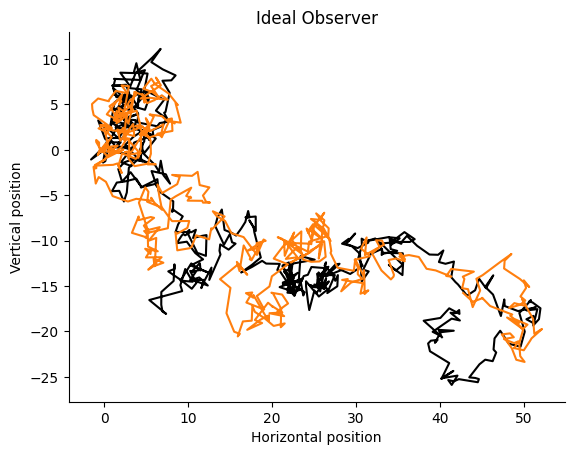

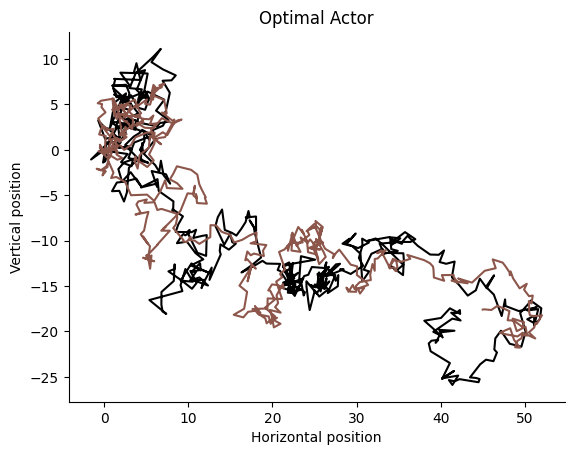

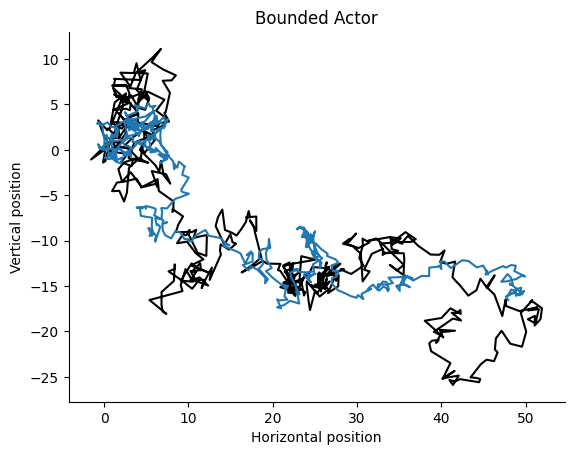

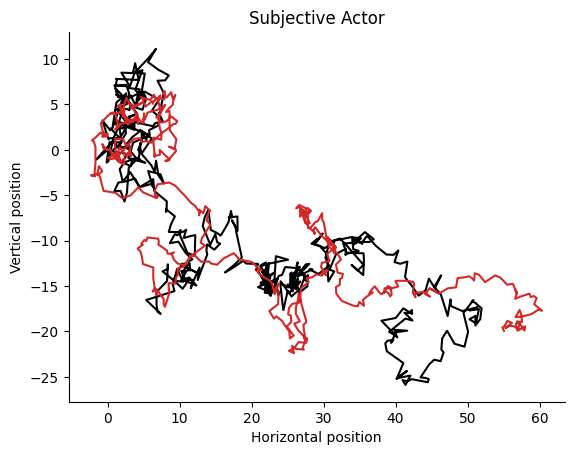

In [49]:


i = 2

for name, model in models.items():
    if name == "IdealObserver":
        x, x_hat, y, u = model.simulate(rng_key=random.PRNGKey(0), n=20, return_all=True)
        x = jnp.stack([x[..., 0], x_hat[..., 0], x[..., 2], x_hat[..., 2]], axis=-1)
    else:
        x = model.simulate(rng_key=random.PRNGKey(0), n=20)

    plt.plot(x[i, :, 0], x[i, :, 2], color="k")
    plt.plot(x[i, :, 1], x[i, :, 3], color=MODEL_COLORS[name])
    plt.title(" ".join(re.split('(?<=.)(?=[A-Z])', name)))
    plt.xlabel("Horizontal position")
    plt.ylabel("Vertical position")
    plt.savefig(f"{name}.svg")
    plt.show()